<a href="https://colab.research.google.com/github/nicobargioni/machine-learning/blob/main/Nicolas_Bargioni_TP3_AA1_clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP3 AA1 Clasificación

**Nicolás Bargioni**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

**LEA LAS INDICACIONES DE ENTREGA EN EL FORO DE LA TAREA**

#**Tarea: Entrenamiento y evaluación de clasificadores**  

**Objetivo**: Aplicar un modelo de clasificación a un dataset de su elección, procesar dicho dataset para poder usarlo para entrenamiento, indicar y compartir todos los recursos utilizados, evaluar su rendimiento.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets?Task=Classification&skip=0&take=10&sort=desc&orderBy=Relevance&search=
   - Requisitos:  
     - Debe tener al menos 4 variables.
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

El dataset Hepatitis, proveniente del UCI Machine Learning Repository, contiene información clínica de 155 pacientes con diagnóstico de hepatitis.

El objetivo del conjunto de datos es predecir si un paciente vive o muere (Class: LIVE o DIE) a partir de características médicas y demográficas, como la edad, el sexo, la presencia de síntomas (fatiga, anorexia, ascitis), el uso de esteroides o antivirales, y resultados de laboratorio (niveles de bilirrubina, fosfatasa alcalina, albúmina, etc.).

Las variables incluyen tanto datos categóricos como continuos, y el dataset presenta algunos valores faltantes, lo cual lo convierte en un caso realista y valioso para aplicar técnicas de clasificación supervisada en contextos médicos.

In [33]:
!pip install ucimlrepo

Primero voy a unificar features y target en un solo df para poder hacer el EDA más fácilmente

In [34]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
# fetch dataset
hepatitis = fetch_ucirepo(id=46)

# data (as pandas dataframes)
X = hepatitis.data.features
y = hepatitis.data.targets

df = pd.concat([hepatitis.data.features, hepatitis.data.targets], axis=1)
df.head()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology,Class
0,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1,2
1,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1,2
2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1,2
3,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1,2
4,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1,2


A continuación se describen las variables:

Class: variable objetivo (target). Indica si el paciente vivió (LIVE) o murió (DIE).

Age: edad del paciente (valores enteros entre 10 y 80 años).

Sex: sexo del paciente (male o female).

Steroid: indica si el paciente recibió tratamiento con esteroides (yes / no).

Antivirals: indica si se administraron antivirales (yes / no).

Fatigue: si el paciente presentó fatiga (yes / no).

Malaise: si presentó malestar general (yes / no).

Anorexia: si hubo pérdida de apetito (yes / no).

Liver Big: agrandamiento del hígado detectado (yes / no).

Liver Firm: firmeza anormal del hígado al examen físico (yes / no).

Spleen Palpable: si el bazo era palpable (yes / no).

Spiders: presencia de "arañas vasculares" en la piel (yes / no).

Ascites: acumulación de líquido en el abdomen (yes / no).

Varices: presencia de várices esofágicas u otras (yes / no).

Bilirubin: nivel de bilirrubina en sangre (mg/dL).

Alk Phosphate: nivel de fosfatasa alcalina, una enzima hepática (U/L).

SGOT: nivel de la enzima hepática SGOT (AST) (U/L).

Albumin: concentración de albúmina en sangre (g/dL).

Protime: tiempo de protrombina, relacionado con la coagulación (segundos).

Histology: resultado del estudio histológico del hígado (yes / no).


## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - Describan si observan o no relaciones entre algunas variables.  


##A las distribuciones las voy a ver una vez que haya imputado los valores faltantes. Imputar previamente asegura que la representación de las distribuciones, correlaciones, patrones, etc entre variables sea completa y realista, sin sesgos provocados por la ausencia de datos. Esto permite tomar mejores decisiones sobre escalado, detección de outliers o selección de features para el modelado posterior. Además seaborn y matplotlib no funcionan bien con NaNs

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              155 non-null    int64  
 1   Sex              155 non-null    int64  
 2   Steroid          154 non-null    float64
 3   Antivirals       155 non-null    int64  
 4   Fatigue          154 non-null    float64
 5   Malaise          154 non-null    float64
 6   Anorexia         154 non-null    float64
 7   Liver Big        145 non-null    float64
 8   Liver Firm       144 non-null    float64
 9   Spleen Palpable  150 non-null    float64
 10  Spiders          150 non-null    float64
 11  Ascites          150 non-null    float64
 12  Varices          150 non-null    float64
 13  Bilirubin        149 non-null    float64
 14  Alk Phosphate    126 non-null    float64
 15  Sgot             151 non-null    float64
 16  Albumin          139 non-null    float64
 17  Protime         

In [36]:
df.describe()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology,Class
count,155.000000,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,145.000000,144.000000,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,155.000000,155.000000
mean,41.200000,1.103226,1.506494,1.845161,1.350649,1.603896,1.792208,1.827586,1.583333,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,61.852273,1.451613,1.793548
std,12.565878,0.305240,0.501589,0.362923,0.478730,0.490682,0.407051,0.379049,0.494727,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499266,0.406070
min,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,0.000000,1.000000,1.000000
25%,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,46.000000,1.000000,2.000000
50%,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,61.000000,1.000000,2.000000
75%,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,76.250000,2.000000,2.000000
max,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,100.000000,2.000000,2.000000


##Imputación de valores faltantes

In [37]:
df.isnull().sum().sort_values(ascending = False)

,0
Protime,67
Alk Phosphate,29
Albumin,16
Liver Firm,11
Liver Big,10
Bilirubin,6
Spleen Palpable,5
Spiders,5
Varices,5
Ascites,5


Como tengo variables categóricas y numéricas continuas con NaNs, tengo que separarlas para imputar con la moda en una, y con la mediana en la otra. Con la mediana, porque al ser un dataset de medicina, puede haber outliers naturales que tengo que respetar (por ejemplo, bilirrubina muy alta)

In [38]:
# Columnas categóricas (binarias tipo sí/no)
cat_cols = ['Steroid', 'Fatigue', 'Malaise', 'Anorexia', 'Liver Big', 'Liver Firm',
            'Spleen Palpable', 'Spiders', 'Ascites', 'Varices', 'Histology']

# Columnas numéricas continuas
num_cols = ['Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime']

In [39]:
from sklearn.impute import SimpleImputer

# Imputador para variables categóricas (moda)
imputer_cat = SimpleImputer(strategy='most_frequent')

# Imputador para variables numéricas (mediana)
imputer_num = SimpleImputer(strategy='median')

In [40]:
# Aplicar imputación a las columnas categóricas
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

# Aplicar imputación a las columnas numéricas
df[num_cols] = imputer_num.fit_transform(df[num_cols])

In [41]:
df.isnull().sum().sort_values(ascending = False)

,0
Age,0
Sex,0
Steroid,0
Antivirals,0
Fatigue,0
Malaise,0
Anorexia,0
Liver Big,0
Liver Firm,0
Spleen Palpable,0


In [42]:
df.describe()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology,Class
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,41.200000,1.103226,1.509677,1.845161,1.348387,1.606452,1.793548,1.838710,1.612903,1.806452,1.670968,1.870968,1.883871,1.410968,101.522581,85.174194,3.836129,61.483871,1.451613,1.793548
std,12.565878,0.305240,0.501527,0.362923,0.478004,0.490120,0.406070,0.368991,0.488665,0.396360,0.471385,0.336322,0.321418,1.191178,47.082042,88.590122,0.619267,17.198745,0.499266,0.406070
min,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.000000,1.000000
25%,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.800000,78.000000,32.500000,3.500000,57.000000,1.000000,2.000000
50%,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,85.000000,58.000000,4.000000,61.000000,1.000000,2.000000
75%,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000,2.000000
max,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000,2.000000


##Visualización

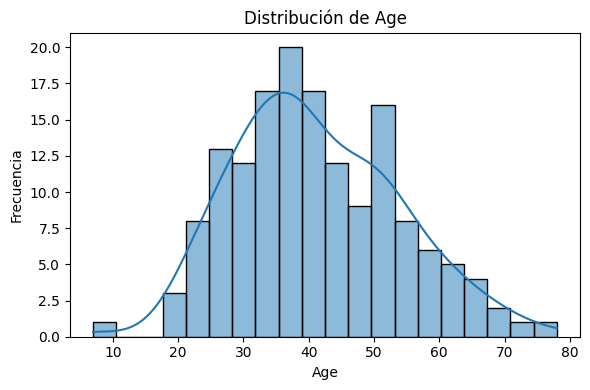

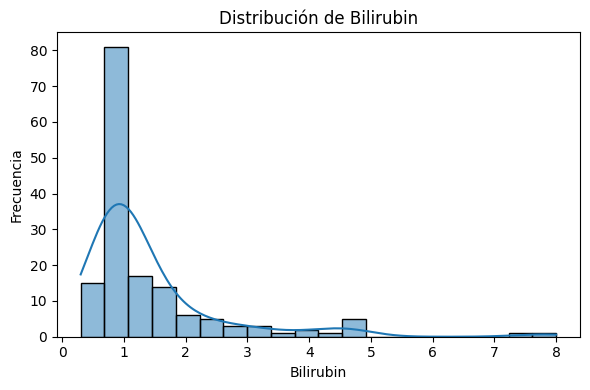

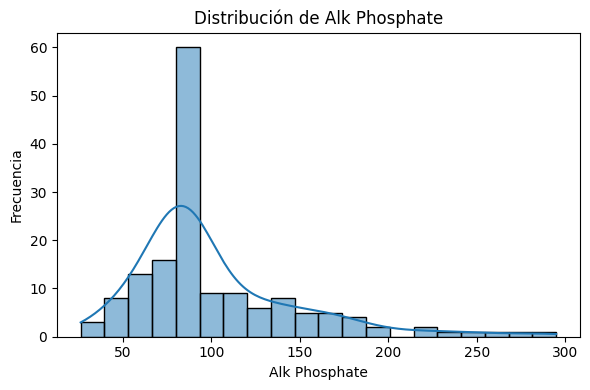

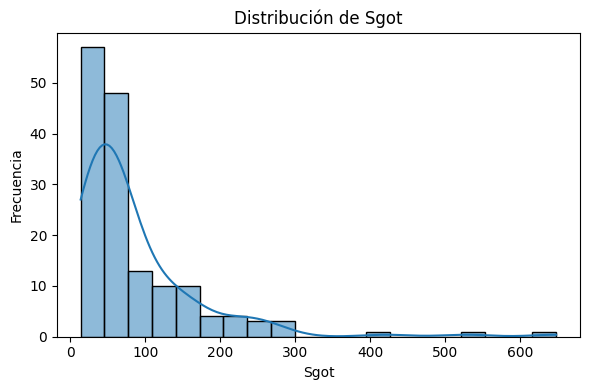

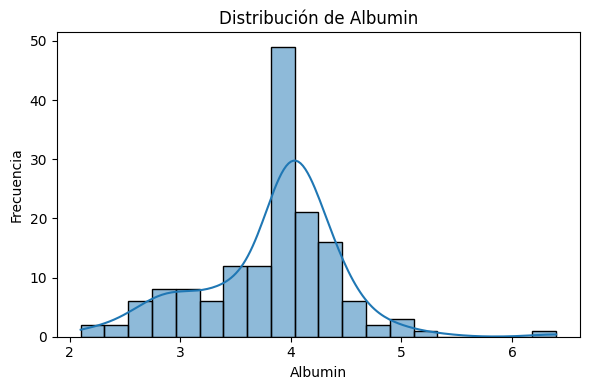

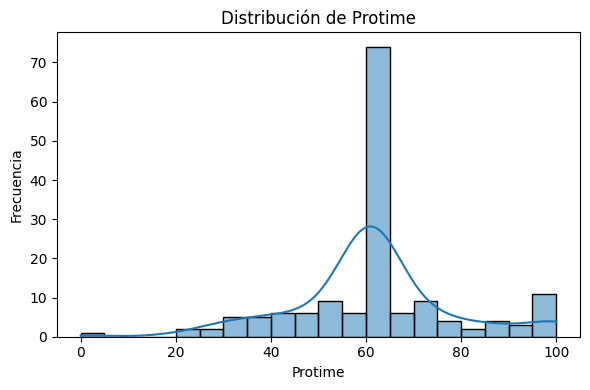

In [43]:
#@title Distribución de variables numéricas

import seaborn as sns
import matplotlib.pyplot as plt

# Lista de columnas numéricas reales
num_cols = ['Age', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

La variable Age presenta una distribución aproximadamente normal, centrada entre los 30 y 50 años, lo que indica una buena representación de adultos en distintos rangos etarios.

En cambio, variables como Bilirubin, Alk Phosphate y Sgot presentan distribuciones fuertemente sesgadas hacia la izquierda, lo cual sugiere la presencia de outliers que podrían influir en ciertos modelos sensibles a escala.

Albumin, por su parte, muestra una distribución más simétrica y concentrada alrededor de los 4 g/dL. Estas visualizaciones me permiten evaluar la necesidad de escalar o transformar los datos antes del modelado.

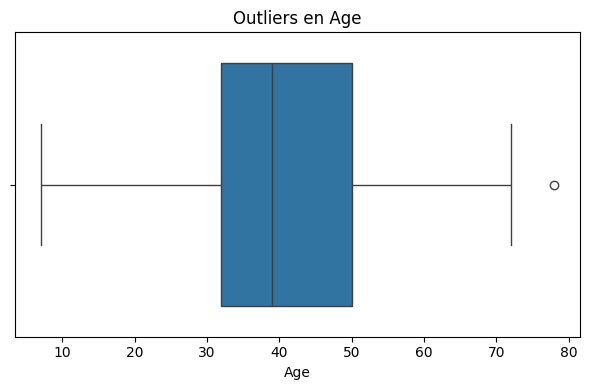

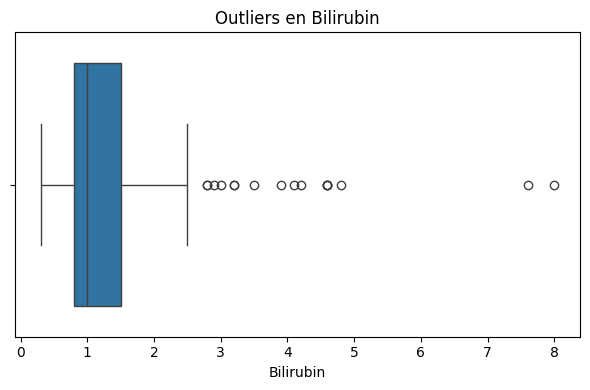

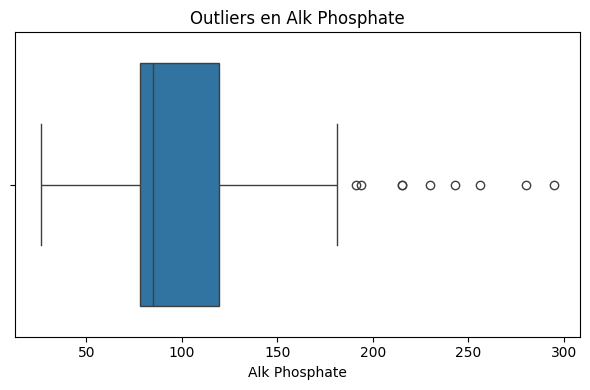

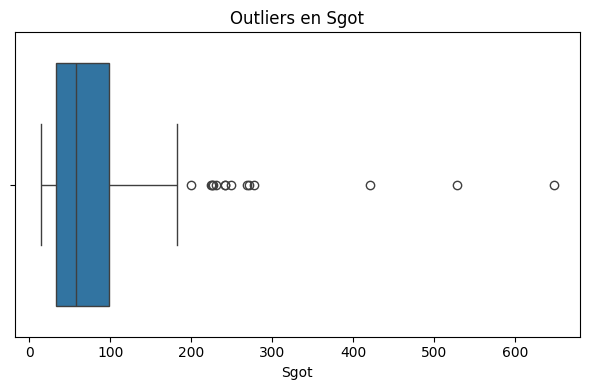

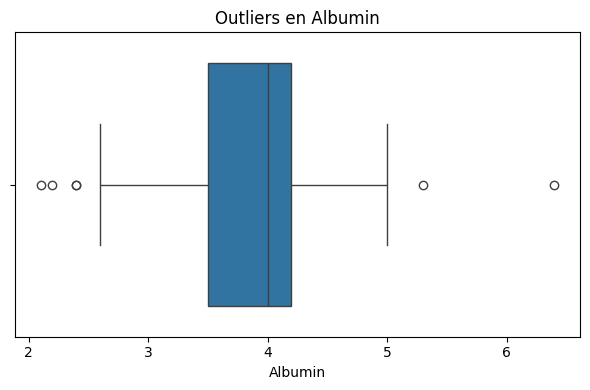

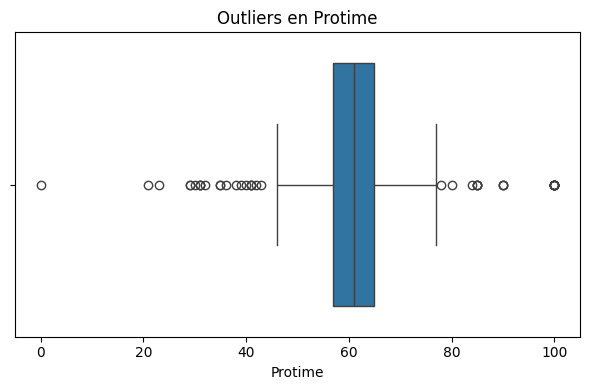

In [44]:
#@title Detección de outliers

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Outliers en {col}')
    plt.tight_layout()
    plt.show()

Respecto a los outliers, voy a hacer lo siguiente, considerando el punto de vista clínico:

1. Bilirubin: outliers son esperables y clínicamente válidos. Los dejo

2. Alk Phosphate (Fosfatasa alcalina): enzima hepática, puede aumentar por enfermedad hepática u ósea. Valores elevados no siempre son errores, pueden deberse a múltiples causas. Valores extremadamente altos y muy pocos pacientes con esos valores, podrían distorsionar. Voy a **winsorizar**

3. SGOT (AST): enzima hepática. Niveles altos pueden significar daño hepático grave. Hay distribución asimétrica, clínicamente esperable. Voy a winsorizar porque el nivel no es descabellado.

4. Albumin: proteína producida por el hígado. Bajos niveles = mal pronóstico. Voy a mantenerlos porque niveles extremos no suelen ser errores.

A protime la voy a analizar por separado, porque tenía muchos nulos antes de imputar con la mediana, entonces, dado que clínicamente es una variable que sé que tiene cierta influencia, y que en los registros faltantes tomó el valor de una constante "ficticia", puede que haya perdido el poder predictivo que debería tener

In [45]:
#@title Comparación de distribución: Protime original vs imputada

hepatitis = fetch_ucirepo(id=46)

df_nuevo = pd.concat([hepatitis.data.features, hepatitis.data.targets], axis=1)

In [46]:
df_nuevo

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology,Class
0,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1,2
1,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1,2
2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1,2
3,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1,2
4,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2,1
151,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2,2
152,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2,2
153,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2,2


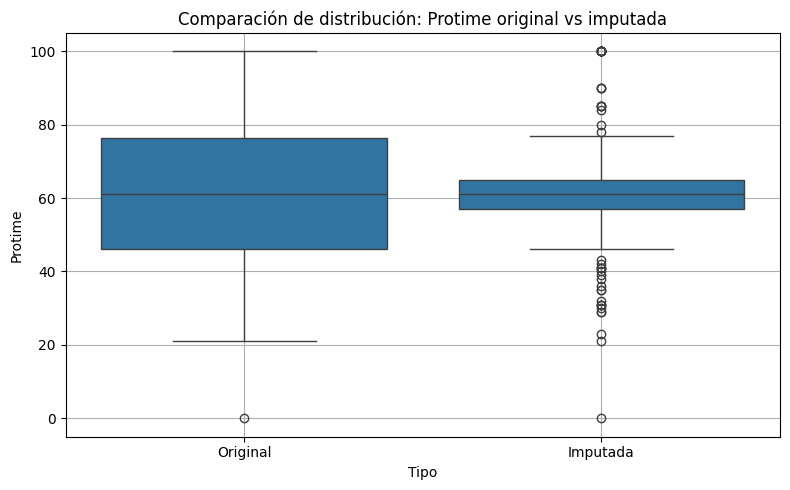

In [47]:
# Copio la columna original con valores faltantes
protime_original = df_nuevo['Protime'].copy()

# Imputo los nan con la mediana
protime_median = df_nuevo['Protime'].fillna(df_nuevo['Protime'].median())

# Creo un nuevo DataFrame para comparar
# Concatenar primero y luego resetear el index
df_plot = pd.concat([
    pd.DataFrame({'Protime': protime_original, 'Tipo': 'Original'}),
    pd.DataFrame({'Protime': protime_median, 'Tipo': 'Imputada'})
]).reset_index(drop=True) # Reset index AFTER concatenation

# Grafico boxplots
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_plot, x='Tipo', y='Protime')
plt.title("Comparación de distribución: Protime original vs imputada")
plt.grid(True)
plt.tight_layout()
plt.show()

Al imputar con la mediana, se concentran los valores faltantes en un único valor (el del 50%). Por lo tanto, la imputación con la mediana no distorsionó la forma de la variable, ni generó valores extremos que antes no existían.

Eso es bueno: indica que la imputación fue conservadora y respetuosa del comportamiento original de la variable (aunque disminuye la varianza). En la vida real, debería consultar con un profesional para ver si no convendría directamente eliminarla, pero para este caso la voy a dejar, quitándole virtualmente cierto peso a su influencia en la clase a predecir.

Conclusión: dejo los outliers tal como están



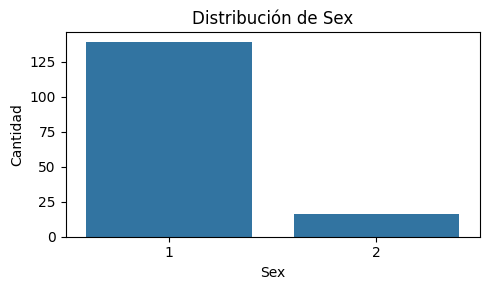

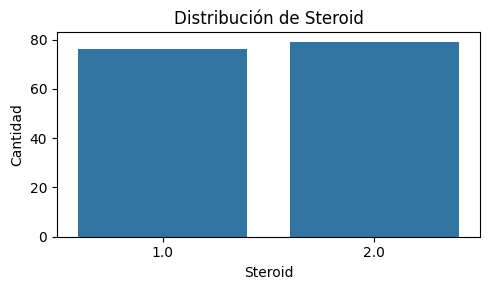

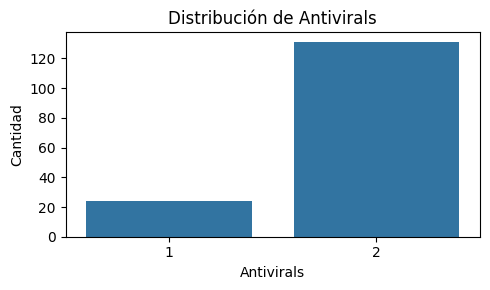

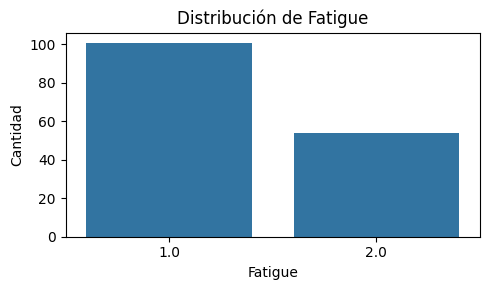

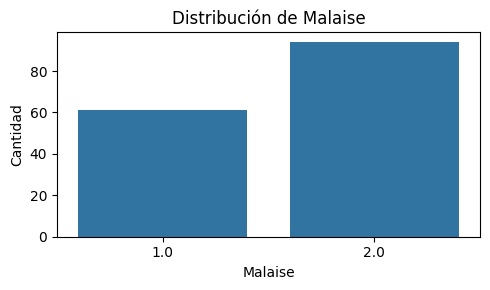

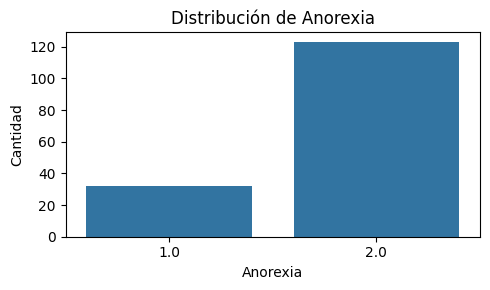

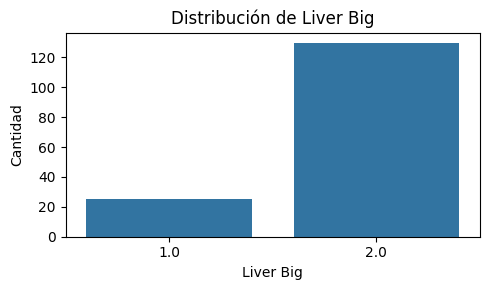

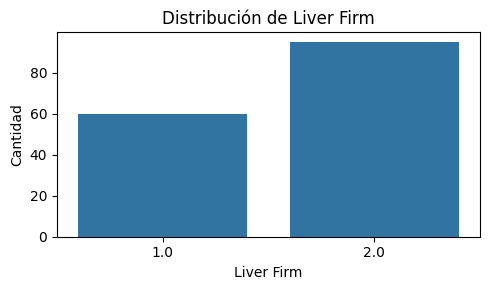

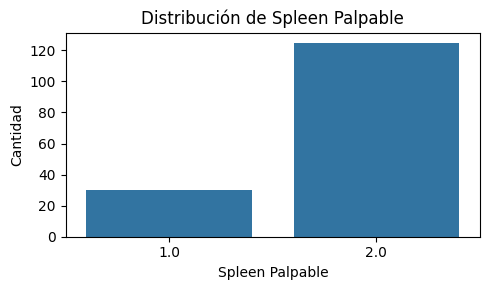

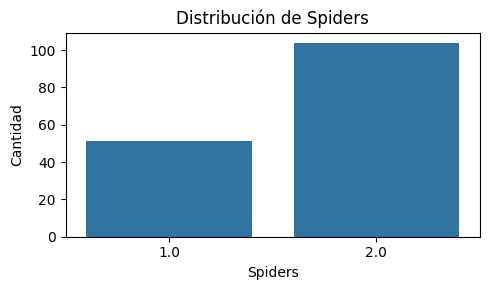

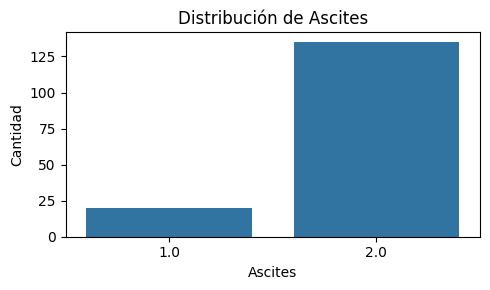

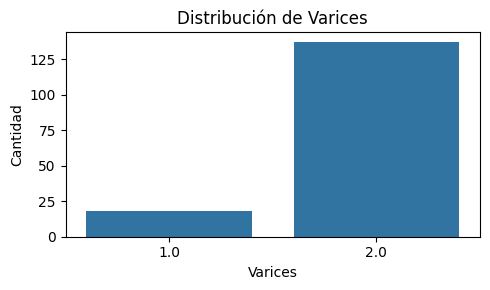

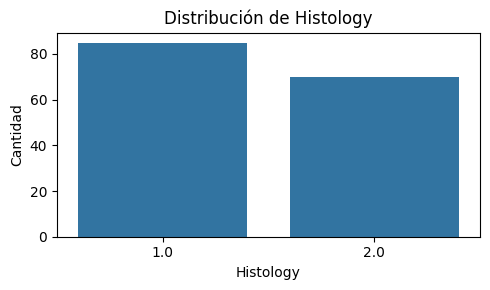

In [48]:
#@title Distribución de variables categóricas (binarias)

cat_cols = ['Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia',
            'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders',
            'Ascites', 'Varices', 'Histology']

for col in cat_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=df[col])
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad')
    plt.tight_layout()
    plt.show()

Acá estoy visualizando la distribución de estas variables con countplots para verificar si hay clases desbalanceadas que puedan afectar el rendimiento de los modelos.

Se observa, por ejemplo, que la variable Sex presenta una fuerte desproporción entre hombres y mujeres, mientras que variables como Steroid y Histology están más equilibradas.

Esta información es útil para tener en cuenta en el análisis posterior y evaluar si será necesario aplicar técnicas de balanceo, como sobremuestreo (SMOTE) o submuestreo, al entrenar los modelos de clasificación.

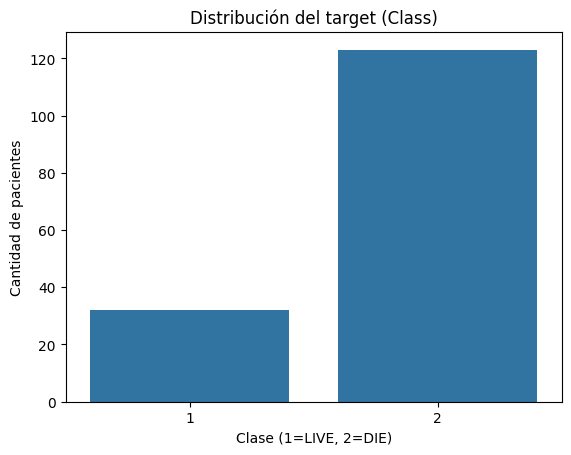

In [49]:
#@title Distribución del target

sns.countplot(x='Class', data=df)

plt.title("Distribución del target (Class)")
plt.xlabel("Clase (1=LIVE, 2=DIE)")
plt.ylabel("Cantidad de pacientes")
plt.show()

La variable objetivo está codificada como 1 = LIVE y 2 = DIE. Al analizar su distribución, se observa un fuerte desbalance entre las clases: hay significativamente más pacientes en la clase 2 (DIE) que en la clase 1 (LIVE).

Este desequilibrio afecta a los algoritmos de clasificación, ya que tienden a favorecer la clase mayoritaria y a subestimar la importancia de la minoritaria. Por esta razón, será necesario considerar técnicas para manejar el desbalance, como el sobremuestreo de la clase minoritaria (por ejemplo, mediante SMOTE).

In [50]:
#@title Tratamiento de outliers

from scipy.stats.mstats import winsorize

# Copia del DataFrame original para no modificarlo directamente
df_winsor = df.copy()

# Winsorizamos Alk Phosphate y SGOT (AST) al 5% por cada extremo (puede ajustarse)
df_winsor['Alk Phosphate'] = winsorize(df_winsor['Alk Phosphate'], limits=[0.05, 0.05])
df_winsor['Sgot'] = winsorize(df_winsor['Sgot'], limits=[0.05, 0.05])

In [51]:
df_winsor.head(1)

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology,Class
0,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,61.0,1.0,2


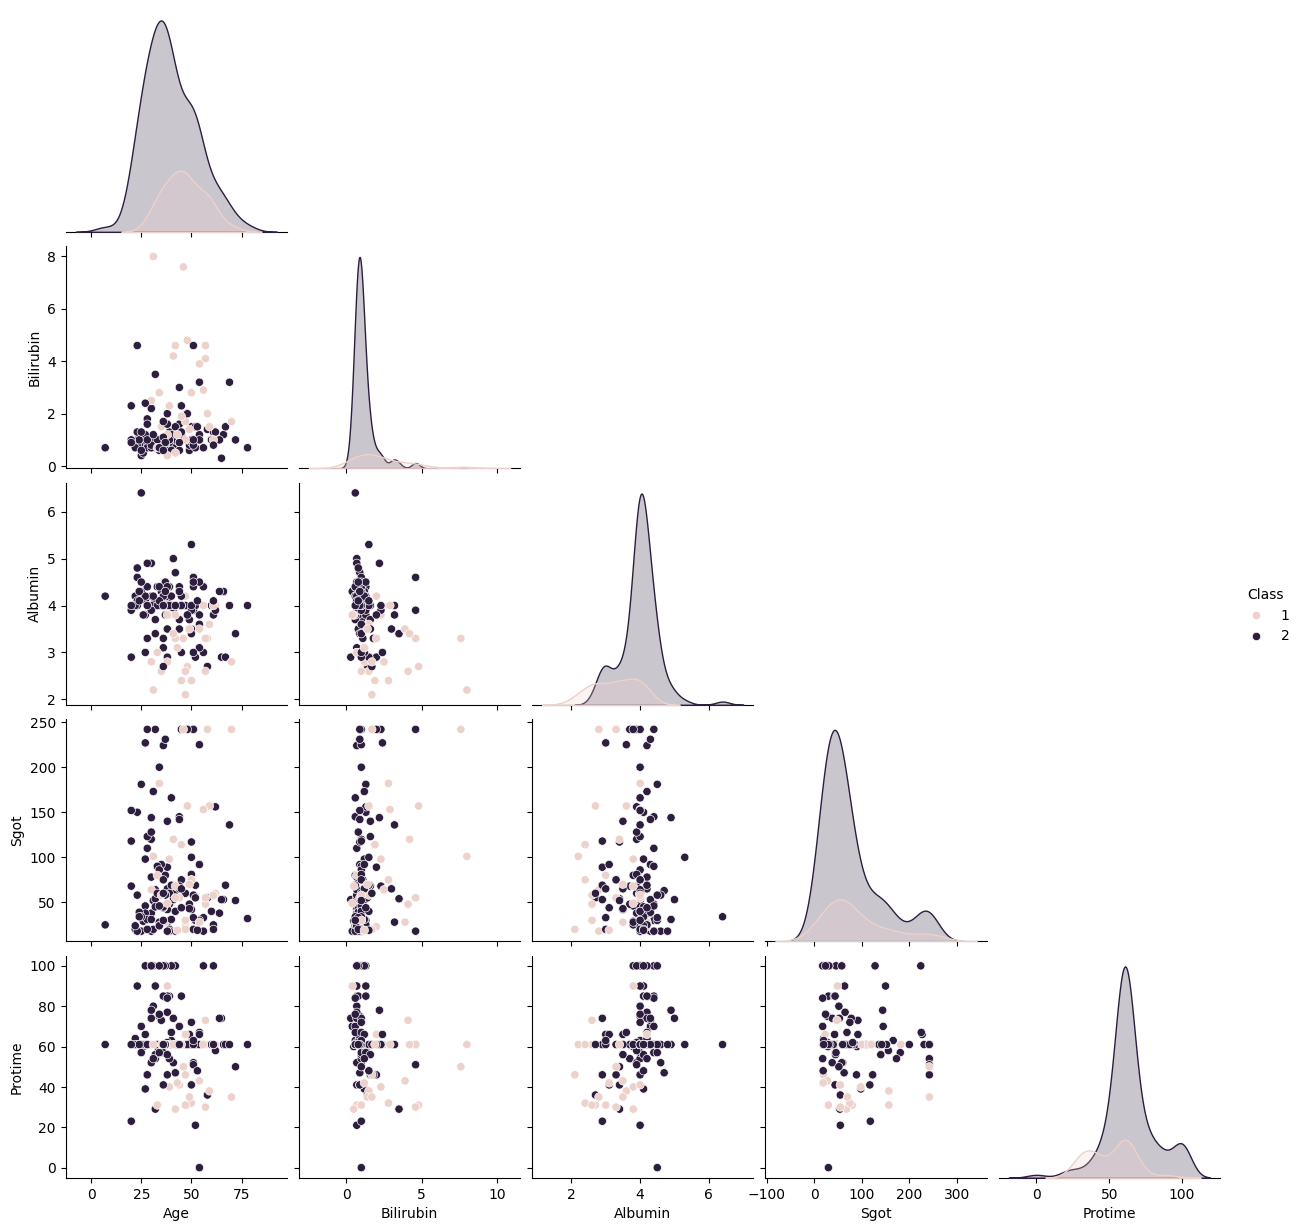

In [52]:
subset = ['Age', 'Bilirubin', 'Albumin', 'Sgot', 'Protime']

sns.pairplot(df_winsor[subset + ['Class']], hue='Class', corner=True)

Luego de imputar los valores faltantes, armé una visualización exploratoria para entender mejor la distribución y comportamiento de las variables del dataset.

Para las variables NUMÉRICAS (como Age, Bilirubin, Sgot, Albumin, Protime, entre otras) armé histogramas con curvas de densidad (kde) para observar su distribución, simetría y posibles concentraciones o asimetrías. Además, complementé con boxplots para detectar posibles valores atípicos (outliers), los cuales pueden influir negativamente en algunos modelos de clasificación. Este análisis permitió identificar rangos comunes, variabilidad y detectar casos extremos que podrían requerir tratamiento posterior.

Por otro lado, para las variables CATEGÓRICAS BINARIAS (como Sex, Steroid, Fatigue, Histology, etc.), armé gráficos de barras (countplots) que muestran la cantidad de ocurrencias de cada categoría. Esto, para detectar posibles desbalances en los datos, tanto en variables predictoras como en la variable objetivo.

Finalmente, armé un pairplot para explorar la relación entre variables numéricas y ver si existe alguna separabilidad visual entre las clases, lo cual puede ser útil al momento de seleccionar un modelo de clasificación adecuado.

**Conclusiones del pairplot**:

1. Bilirubin y Sgot tienden a estar más elevadas en pacientes que murieron (Class = 2), lo que tiene sentido clínico ya que son marcadores de daño hepático.

2. Albumin muestra una concentración más baja en la clase 2, lo cual también es consistente con pronóstico desfavorable (la hipoalbuminemia indica deterioro hepático).

3. Protime no presenta una diferenciación clara entre clases, aunque hay cierta dispersión mayor en la clase 2.

4. Age no parece tener una separación clara entre clases, aunque vale la pena evaluarla en combinación con otras variables.

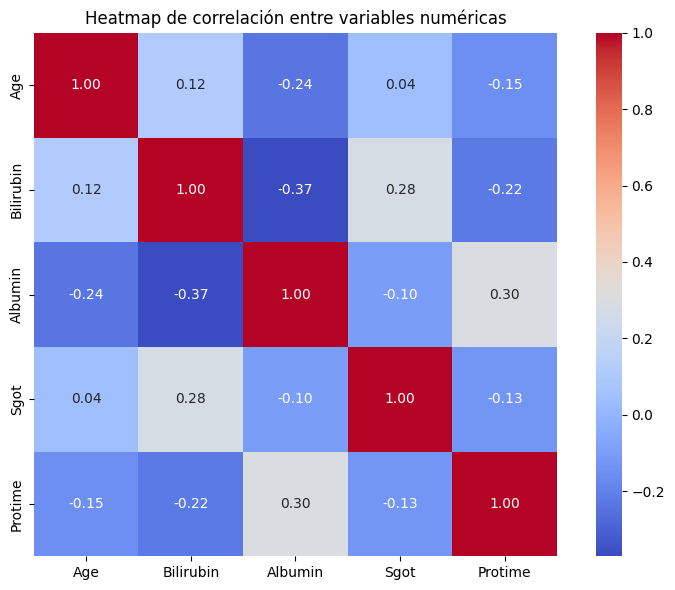

In [53]:
# Filtrar solo las variables numéricas que fueron usadas en el pairplot
numerical_vars = ['Age', 'Bilirubin', 'Albumin', 'Sgot', 'Protime']
correlation_matrix = df_winsor[numerical_vars].corr()

# Crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Heatmap de correlación entre variables numéricas")
plt.tight_layout()
plt.show()

No hay variables redundantes claras, así que no parece necesario eliminar ninguna numérica por multicolinealidad.

Las variables aportan información complementaria, lo que es ideal para los modelos que voy a implementar.

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Otros pasos que crea conveniente para pre-procesar el dataset (mencione y explique)

Detalla las caracteristicas del dataset como nro de variables, nro de filas o instancias, si el problema es clasificacion binaria o multiclase, y otras características que crea conveniente.

Realice la división de datos (entrenamiento / testeo / CV según corresponda)

## Resolución:

**Limpieza**

1. Manejo de valores faltantes
Se identificaron valores faltantes en:

Bilirubin, Albumin, Alk Phosphate, SGOT, Protime

Acción tomada:
Se imputaron los valores faltantes utilizando la mediana, ya que:

Las variables son numéricas continuas

La mediana es robusta ante outliers (que estaban presentes)

No se quería perder información (pocas filas en total: 155)

La imputación conservó la forma general de la distribución.

========================================

2. Manejo de outliers
Se identificaron valores extremos principalmente en:

Alk Phosphate, Sgot y Protime

Acción tomada:
Se aplicó winsorización al 5% y 95% en Sgot y Protime para evitar que los extremos distorsionen los modelos.

Esto redujo la varianza sin perder la forma de la distribución.

========================================

3. Variables descartadas:

**Alk Phosphate y Protime**

Motivos:

- Alto número de outliers

- Distribución fuertemente asimétrica

- Baja correlación con la clase (Class)

- Redundante con otras variables hepáticas más representativas (como SGOT, Bilirubin)

========================================

4. Variables categóricas binarias

Estas variables están codificadas como 1 o 2 (no como texto). Son:

**Sex, Ascites, Varices, Spiders, Edema, Histology**

Estas variables están codificadas numéricamente como 1 y 2.

Para la Regresión Logística, voy a aplicar One-Hot Encoding para convertirlas en variables binarias.

========================================

Escalado:

Dado que voy a hacer regresión logística, voy a escalar las variables numéricas. Se detectó un fuerte desbalance entre las clases del target (LIVE vs. DIE). Se considerará el uso de ponderación de clases (class_weight='balanced') en la regresión logística para evitar que el modelo favorezca sistemáticamente la clase mayoritaria.




## 4. **Clasificación con logistic regression**  
   

En este apartado entrenará un clasificador con la librería sklearn usando logistic regresion.

### 4.1 Entrenamiento y evaluación

In [54]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np

# 1. Preparamos los datos
df_sin_protime = df_winsor.drop(columns=["Protime", "Alk Phosphate"])

X = df_sin_protime.drop("Class", axis=1)
y = df_sin_protime["Class"]

y = y.replace({2: 0})  # Ahora: 0 = Muere, 1 = Vive

cat_cols = [
    "Sex", "Steroid", "Antivirals", "Fatigue", "Malaise", "Anorexia",
    "Liver Big", "Liver Firm", "Spleen Palpable", "Spiders",
    "Ascites", "Varices", "Histology"
]

num_cols = [col for col in X.columns if col not in cat_cols]

# Acá estoy separando entre variables categóricas binarias y numéricas
# para hacer one hot encoding en las primeras y escalar las segundas

# 2. Validación cruzada manual con SMOTE dentro de cada fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
precisions = []
recalls = []
f1s = []

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # One-hot encoding
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    X_train_cat = encoder.fit_transform(X_train[cat_cols])
    X_test_cat = encoder.transform(X_test[cat_cols])

    # Escalado
    scaler = StandardScaler()
    X_train_num = scaler.fit_transform(X_train[num_cols])
    X_test_num = scaler.transform(X_test[num_cols])

    # Combinar
    X_train_final = np.hstack([X_train_num, X_train_cat])
    X_test_final = np.hstack([X_test_num, X_test_cat])

    # SMOTE ---> esto es porque las clases del dataset están desbalanceadas
    # SMOTE crea instancias sintéticas de la clase minoritaria (muere) solo sobre
    # el set de entrenamiento, para balancearlo

    smote = SMOTE(random_state=42)
    X_train_bal, y_train_bal = smote.fit_resample(X_train_final, y_train)

    # Modelo
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_bal, y_train_bal)

    # Evaluar
    y_pred = model.predict(X_test_final)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    accuracies.append(report['accuracy'])
    precisions.append(report['macro avg']['precision'])
    recalls.append(report['macro avg']['recall'])
    f1s.append(report['macro avg']['f1-score'])

# Mostrar resultados promedio
print("Resultados promedio tras validación cruzada (5-fold):")
print(f"Accuracy promedio:  {np.mean(accuracies):.2f}")
print(f"Precision promedio: {np.mean(precisions):.2f}")
print(f"Recall promedio:    {np.mean(recalls):.2f}")
print(f"F1-score promedio:  {np.mean(f1s):.2f}")

Resultados promedio tras validación cruzada (5-fold):
Accuracy promedio:  0.80
Precision promedio: 0.73
Recall promedio:    0.75
F1-score promedio:  0.73


In [55]:
print("Clases después del reemplazo:", np.unique(y))  # Debería dar [0 1]

Clases después del reemplazo: [0 1]


In [56]:
X.head(1)

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Sgot,Albumin,Histology
0,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,18.0,4.0,1.0


##Evaluación final fuera de CV

Ya hice validación cruzada con SMOTE y el resultado fue positivo.
Ahora quiero entrenar el modelo final con 80% de datos en train y 20% en test

In [57]:
from sklearn.model_selection import train_test_split

# 1. Divido en entrenamiento y testeo externo (20% testeo)
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. Preprocesamiento
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_cat = encoder.fit_transform(X_train_ext[cat_cols])
X_test_cat = encoder.transform(X_test_ext[cat_cols])

scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train_ext[num_cols])
X_test_num = scaler.transform(X_test_ext[num_cols])

X_train_final = np.hstack([X_train_num, X_train_cat])
X_test_final = np.hstack([X_test_num, X_test_cat])

# 3. Balanceo SOLO EL ENTRENAMIENTO
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_final, y_train_ext)

# 4. Entreno modelo final
model = LogisticRegression(max_iter=1000)
model.fit(X_train_bal, y_train_bal)

LogisticRegression(max_iter=1000)

### 4.2 Métricas de evaluación

Muestre el desempeño en el conjunto de datos de entrenamiento y testeo.
Mencione las métricas utilizadas. No se olvide de mostrar la matriz de confusión.
Explique los resultados obtenidos.

In [58]:
# 5. Predicciones y evaluación
from sklearn.metrics import classification_report, confusion_matrix

print("\n🔹 Evaluación en Entrenamiento (con SMOTE):")
y_pred_train = model.predict(X_train_bal)
print(confusion_matrix(y_train_bal, y_pred_train))
print(classification_report(y_train_bal, y_pred_train, target_names=["Muere", "Vive"]))

print("\n🔹 Evaluación en Testeo Real:")
y_pred_test = model.predict(X_test_final)
print(confusion_matrix(y_test_ext, y_pred_test))
print(classification_report(y_test_ext, y_pred_test, target_names=["Muere", "Vive"]))


🔹 Evaluación en Entrenamiento (con SMOTE):
[[86 12]
 [11 87]]
              precision    recall  f1-score   support

       Muere       0.89      0.88      0.88        98
        Vive       0.88      0.89      0.88        98

    accuracy                           0.88       196
   macro avg       0.88      0.88      0.88       196
weighted avg       0.88      0.88      0.88       196


🔹 Evaluación en Testeo Real:
[[20  5]
 [ 1  5]]
              precision    recall  f1-score   support

       Muere       0.95      0.80      0.87        25
        Vive       0.50      0.83      0.62         6

    accuracy                           0.81        31
   macro avg       0.73      0.82      0.75        31
weighted avg       0.86      0.81      0.82        31



La evaluación del modelo entrenado con datos balanceados mediante SMOTE muestra un desempeño sólido en el conjunto de entrenamiento, con métricas equilibradas entre clases (precisión, recall y F1-score en torno a 0.88), lo que indica que el modelo aprendió de forma simétrica a clasificar casos de "Muere" y "Vive".

Al evaluar sobre el conjunto de testeo real (sin balancear), el modelo mantiene un buen desempeño general (accuracy = 0.81), destacándose especialmente en la clase crítica “Muere”, con un recall de 0.80 (detecta correctamente 8 de cada 10 muertes reales) y una precisión de 0.95 (pocos falsos positivos).

En contrapartida, la clase “Vive” presenta menor precisión (0.50), aunque su recall es alto (0.83), lo que sugiere que el modelo tiende a etiquetar casos como “Muere” por precaución. Este comportamiento es clínicamente deseable, ya que prioriza la detección de muertes (reduciendo falsos negativos) incluso a costa de etiquetar algunos pacientes vivos como casos de riesgo.

En conjunto, los resultados validan que el modelo generaliza bien fuera del entorno balanceado y que su configuración actual es adecuada para entornos clínicos donde el costo de no detectar un fallecimiento potencial es alto.

In [59]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

y_proba = model.predict_proba(X_test_final)[:, 0]  # Acá obtengo la probabilidad de que cada muestra del test sea "Muere"

thresholds = np.linspace(0.1, 0.9, 100) # Acá armo 100 posbiles umbrales entre 0.1 y 0.9
f1_scores = []

for threshold in thresholds:
    y_pred_thresh = (y_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_thresh, pos_label=0)
    f1_scores.append(f1)

# Encontrar umbral con mejor F1-score
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"🔍 Mejor umbral para clase 'Muere': {best_threshold:.2f}")
print(f"⭐️ F1-score en ese umbral: {best_f1:.2f}")

# Aplicar el mejor umbral
y_pred_best = (y_proba >= best_threshold).astype(int)

# Mostrar resultados
print("\n📊 Matriz de confusión con umbral óptimo:")
print(confusion_matrix(y_test, y_pred_best))

print("\n📄 Reporte de clasificación:")
print(classification_report(y_test, y_pred_best, target_names=["Muere", "Vive"]))

🔍 Mejor umbral para clase 'Muere': 0.88
⭐️ F1-score en ese umbral: 0.83

📊 Matriz de confusión con umbral óptimo:
[[20  4]
 [ 4  3]]

📄 Reporte de clasificación:
              precision    recall  f1-score   support

       Muere       0.83      0.83      0.83        24
        Vive       0.43      0.43      0.43         7

    accuracy                           0.74        31
   macro avg       0.63      0.63      0.63        31
weighted avg       0.74      0.74      0.74        31



##¿Por qué cambié el umbral de decisión?

Para mejorar la detección de la clase crítica “Muere”, se ajustó el umbral de decisión del modelo. Por defecto, LogisticRegression usa un umbral de 0.5, pero en escenarios con clases desbalanceadas y alto costo de los falsos negativos (como en medicina), puede ser útil ajustar este umbral.

Se evaluaron 100 posibles valores entre 0.1 y 0.9, calculando el F1-score para la clase “Muere” (codificada como 0). El mejor rendimiento se obtuvo con un umbral de 0.88, logrando un F1-score de 0.83 para esa clase.

Con este umbral, el modelo clasificó correctamente 20 de 24 muertes reales (recall = 0.83) y tuvo 4 falsos positivos (precisión = 0.83). La clase “Vive” mostró un desempeño inferior (F1 = 0.43), lo cual es esperable dado que se optimizó el modelo para priorizar muertes.

Si bien el accuracy global fue de 0.74, lo más relevante es que el modelo logró un buen rendimiento en la clase crítica, ajustando su comportamiento de acuerdo a los objetivos clínicos. Esta estrategia es especialmente útil en problemas médicos donde el costo de no detectar un caso grave supera el de una falsa alarma.

## 5- ** Otro clasificador **

### 5.1 Elija otro modelo para entrenar un clasificador

Elija alguno de los modelos vistos: kNN, SVM o MLP para entrenar un clasificador usando los parámetros por defecto de sklearn.

Justifique su elección.

### 5.2 Entrenamiento del modelo.

KNN es débil para este caso, porque el dataset es pequeño, con mezcla de variables y posible ruido. Además, usar SMOTE con k-NN puede ser contraproducente, ya que ambos se basan en distancias.

MLP puede ser potente si está bien regularizado, pero es más propenso a sobreajuste con pocas muestras.

SVM es una excelente opción para este dataset porque funciona muy bien en problemas pequeños y con clases difíciles de separar.

In [60]:
from sklearn.svm import SVC

# Validación cruzada manual
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies, precisions, recalls, f1s = [], [], [], []

for train_idx, test_idx in skf.split(X, y):
    # Split
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # OneHot
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    X_train_cat = encoder.fit_transform(X_train[cat_cols])
    X_test_cat = encoder.transform(X_test[cat_cols])

    # Escalado
    scaler = StandardScaler()
    X_train_num = scaler.fit_transform(X_train[num_cols])
    X_test_num = scaler.transform(X_test[num_cols])

    # Combinar
    X_train_final = np.hstack([X_train_num, X_train_cat])
    X_test_final = np.hstack([X_test_num, X_test_cat])

    # SMOTE
    smote = SMOTE(random_state=42)
    X_train_bal, y_train_bal = smote.fit_resample(X_train_final, y_train)

    # Modelo SVM
    model = SVC(
        kernel='rbf',            # También podría ser 'linear' o 'poly'
        C=1.0,                   # Regularización (más bajo = más regularización)
        gamma='scale',          # Puede ser 'scale', 'auto' o un valor como 0.01
        probability=True,       # Para poder usar predict_proba más adelante
        class_weight=None,      # Podrías usar 'balanced' si no usaras SMOTE
        random_state=42
    )

    model.fit(X_train_bal, y_train_bal)

    # Evaluación
    y_pred = model.predict(X_test_final)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    accuracies.append(report['accuracy'])
    precisions.append(report['macro avg']['precision'])
    recalls.append(report['macro avg']['recall'])
    f1s.append(report['macro avg']['f1-score'])

### 5.3 Evaluación del desempeño

In [61]:
# Resultados promedio
print("Resultados promedio tras validación cruzada (SVM):")
print(f"Accuracy promedio:  {np.mean(accuracies):.2f}")
print(f"Precision promedio: {np.mean(precisions):.2f}")
print(f"Recall promedio:    {np.mean(recalls):.2f}")
print(f"F1-score promedio:  {np.mean(f1s):.2f}")

Resultados promedio tras validación cruzada (SVM):
Accuracy promedio:  0.83
Precision promedio: 0.74
Recall promedio:    0.73
F1-score promedio:  0.73


Durante la validación cruzada utilizando un modelo SVM con kernel RBF y parámetros por defecto, se obtuvo un rendimiento inicial sólido. Para cada fold, se aplicó balanceo mediante SMOTE, codificación one-hot de las variables categóricas y escalado de las numéricas, respetando buenas prácticas para modelos sensibles a la escala como SVM.

El modelo alcanzó un accuracy promedio de 0.83, lo que indica una correcta clasificación de la mayoría de los casos. Tanto la precisión (0.74) como el recall (0.73) mostraron un balance razonable entre falsos positivos y falsos negativos. El F1-score promedio de 0.73 confirma este equilibrio, especialmente importante en contextos con clases desbalanceadas como este.

Estos resultados permiten considerar al modelo SVM como una línea base confiable. Si bien el rendimiento es similar al de la regresión logística, futuras mejoras podrían surgir mediante técnicas de tuning de hiperparámetros (C, gamma) y análisis del impacto del umbral de decisión sobre la clase crítica (“Muere”).

## 6  Tuneo de hiperparámetros

En esta sección debe modificar probar cómo la modificación de un hiperparámetro del modelo elegido en punto 5) afecta en los resultados.

Justifique y realice el experimento en esta sección.

Voy a usar gridsearchcv para encontrar los mejores hiperparámetros y voy a reentrenar con stratifiedkfold

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],             # Regularización
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Influencia de cada punto
    'kernel': ['rbf', 'linear']              # Tipo de frontera de decisión
}

svc = SVC(probability=True, random_state=42)

grid = GridSearchCV(svc, param_grid, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)
grid.fit(X_train_bal, y_train_bal)

print("Mejores parámetros:", grid.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Mejores parámetros: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [63]:
#@title StratifiedKFold con tunning de hiperparámetros SIN AJUSTAR UMBRAL DE CLASIFICACION

# Validación cruzada estratificada (5 folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # One-Hot Encoding
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    X_train_cat = encoder.fit_transform(X_train[cat_cols])
    X_test_cat = encoder.transform(X_test[cat_cols])

    # Escalado
    scaler = StandardScaler()
    X_train_num = scaler.fit_transform(X_train[num_cols])
    X_test_num = scaler.transform(X_test[num_cols])

    # Unión de numéricas + categóricas
    X_train_final = np.hstack([X_train_num, X_train_cat])
    X_test_final = np.hstack([X_test_num, X_test_cat])

    # SMOTE para balancear
    smote = SMOTE(random_state=42)
    X_train_bal, y_train_bal = smote.fit_resample(X_train_final, y_train)

    # Modelo SVM optimizado
    model = SVC(
        kernel='rbf',
        C=1,
        gamma=1,
        probability=True,
        random_state=42
    )

    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test_final)

    # Métricas
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    accuracies.append(report['accuracy'])
    precisions.append(report['macro avg']['precision'])
    recalls.append(report['macro avg']['recall'])
    f1s.append(report['macro avg']['f1-score'])

# Promedio de resultados
print("🔁 Resultados promedio tras validación cruzada (SVM optimizado):")
print(f"Accuracy promedio:  {np.mean(accuracies):.2f}")
print(f"Precision promedio: {np.mean(precisions):.2f}")
print(f"Recall promedio:    {np.mean(recalls):.2f}")
print(f"F1-score promedio:  {np.mean(f1s):.2f}")

🔁 Resultados promedio tras validación cruzada (SVM optimizado):
Accuracy promedio:  0.82
Precision promedio: 0.72
Recall promedio:    0.64
F1-score promedio:  0.63


In [64]:
#@title StratifiedKFold con tunning de hiperparámetros AJUSTANDO UMBRAL DE CLASIFICACION

######################
# Acá directamente aumento el umbral de clasificacion SIN PROBAR RESULTADOS FUERA DE CV (sin hacer matriz de confusión ni reporte de resultados),
# porque ya se que quiero que el modelo sea exigente al clasificar muertos
######################

# Probabilidad de la clase 0 ("Muere")
y_proba = model.predict_proba(X_test_final)[:, 0]

# Rango de umbrales a evaluar
thresholds = np.linspace(0.1, 0.9, 100)
f1_scores = []

for threshold in thresholds:
    y_pred_thresh = (y_proba >= threshold).astype(int)
    f1 = f1_score(y_test_ext, y_pred_thresh, pos_label=0)
    f1_scores.append(f1)

# Mejor umbral según F1
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"🔍 Mejor umbral para clase 'Muere': {best_threshold:.2f}")
print(f"⭐️ F1-score en ese umbral: {best_f1:.2f}")

# Evaluación con el mejor umbral
y_pred_best = (y_proba >= best_threshold).astype(int)

print("\n📊 Matriz de confusión con umbral óptimo:")
print(confusion_matrix(y_test_ext, y_pred_best))

print("\n📄 Reporte de clasificación:")
print(classification_report(y_test_ext, y_pred_best, target_names=["Muere", "Vive"]))

🔍 Mejor umbral para clase 'Muere': 0.88
⭐️ F1-score en ese umbral: 0.21

📊 Matriz de confusión con umbral óptimo:
[[ 3 22]
 [ 0  6]]

📄 Reporte de clasificación:
              precision    recall  f1-score   support

       Muere       1.00      0.12      0.21        25
        Vive       0.21      1.00      0.35         6

    accuracy                           0.29        31
   macro avg       0.61      0.56      0.28        31
weighted avg       0.85      0.29      0.24        31



## 6- Conclusiones

Fundamente, justifique con sus palabras.

##Conclusiones sobre LogisticRegression

La regresión logística mostró un desempeño robusto en la clasificación binaria de pacientes con hepatitis, distinguiendo entre casos de muerte y supervivencia.

Mediante un pipeline bien estructurado —que incluyó imputación, winsorización, codificación, escalado, balanceo con SMOTE y ajuste del umbral— se logró un F1-score elevado para la clase crítica “Muere”.

El modelo generalizó de forma consistente en el conjunto de testeo real, con métricas estables y sin sobreajuste, lo que, sumado a su interpretabilidad, lo posiciona como una alternativa confiable en contextos clínicos donde se requiere transparencia y precisión.

##Conclusiones sobre SVM

El clasificador SVM, con kernel RBF y tuning de hiperparámetros mediante validación cruzada, alcanzó un rendimiento competitivo en el entrenamiento balanceado (accuracy ≈ 82%). Sin embargo, al evaluar sobre testeo real, el modelo mostró debilidades importantes al intentar calibrar su umbral de decisión para priorizar la clase “Muere”.

En particular, la calibración de probabilidades en SVM mediante probability=True (Platt Scaling) resultó poco confiable en este dataset, generando un colapso en el desempeño cuando se ajustó el umbral. Esto reveló la limitada capacidad de SVM para manejar desequilibrios severos y ofrecer probabilidades robustas sin un esquema adicional de calibración (e.g. isotonic regression).

Aunque SMOTE balanceó el entrenamiento, no fue suficiente para garantizar una separación efectiva en testeo real. Por ello, SVM, en este contexto, es menos recomendable para tareas críticas donde se requiere priorizar recall en la clase minoritaria.

# Referencias

Youtube - [Canal de Código Máquina](https://www.youtube.com/@CodigoMaquina)

Python Machine Learning - Marcombo